In [174]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [175]:
url='https://raw.githubusercontent.com/MeitavReut/project300/main/%D7%99%D7%95%D7%A7%D7%A8%20%D7%94%D7%9E%D7%97%D7%99%D7%94%20%D7%90%D7%A8%D7%94%D7%91.csv'

In [176]:
us_cost_df=pd.read_csv(url)
us_cost_df

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.65625
31426,3171,WY,False,"Weston County, WY",Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.65625
31427,3171,WY,False,"Weston County, WY",Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.65625
31428,3171,WY,False,"Weston County, WY",Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.65625


In [177]:
#פיצלנו את העמודה של חברי המשפחה להורים וילדים בנפרד
df = pd.DataFrame(us_cost_df)

df['adults'] = df['family_member_count'].str.extract(r'(\d+)p')[0].astype(int)
df['children'] = df['family_member_count'].str.extract(r'p(\d+)c')[0].astype(int)

us_cost_df=df
us_cost_df

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adults,children
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406,1,0
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406,1,1
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406,1,2
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406,1,3
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.65625,2,0
31426,3171,WY,False,"Weston County, WY",Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.65625,2,1
31427,3171,WY,False,"Weston County, WY",Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.65625,2,2
31428,3171,WY,False,"Weston County, WY",Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.65625,2,3


In [318]:


# Calculate the median of 'total_cost' for every 10 rows starting from the first row
medians = []
total_costs = us_cost_df['total_cost'].tolist()

# Iterate through the list in chunks of 10, starting from the first element
for i in range(0, len(total_costs), 10):
    chunk = total_costs[i:i+10]
    median = pd.Series(chunk).median()
    medians.extend([median] * len(chunk))

# Ensure that the length of the medians list matches the length of the data
medians = medians[:len(us_cost_df)]

# Add the calculated medians to the dataframe
us_cost_df['median_total_cost'] = medians

# Display the updated dataframe
print(us_cost_df.head(5))


   case_id state  isMetro            areaname          county  \
0        1    AL     True  Montgomery, AL MSA  Autauga County   
1        1    AL     True  Montgomery, AL MSA  Autauga County   
2        1    AL     True  Montgomery, AL MSA  Autauga County   
3        1    AL     True  Montgomery, AL MSA  Autauga County   
4        1    AL     True  Montgomery, AL MSA  Autauga County   

  family_member_count  housing_cost    food_cost  transportation_cost  \
0                1p0c    8505.72876   3454.91712          10829.16876   
1                1p1c   12067.50240   5091.70788          11588.19288   
2                1p2c   12067.50240   7460.20308          12361.77720   
3                1p3c   15257.15040   9952.23924          13452.18600   
4                1p4c   15257.15040  12182.21400          13744.59840   

   healthcare_cost  other_necessities_cost  childcare_cost        taxes  \
0       5737.47984              4333.81344          0.0000   6392.94504   
1       8659.55640  

**מסקנה1-האם יש קשר בין יוקר המחיה לבין כמות הילדים**

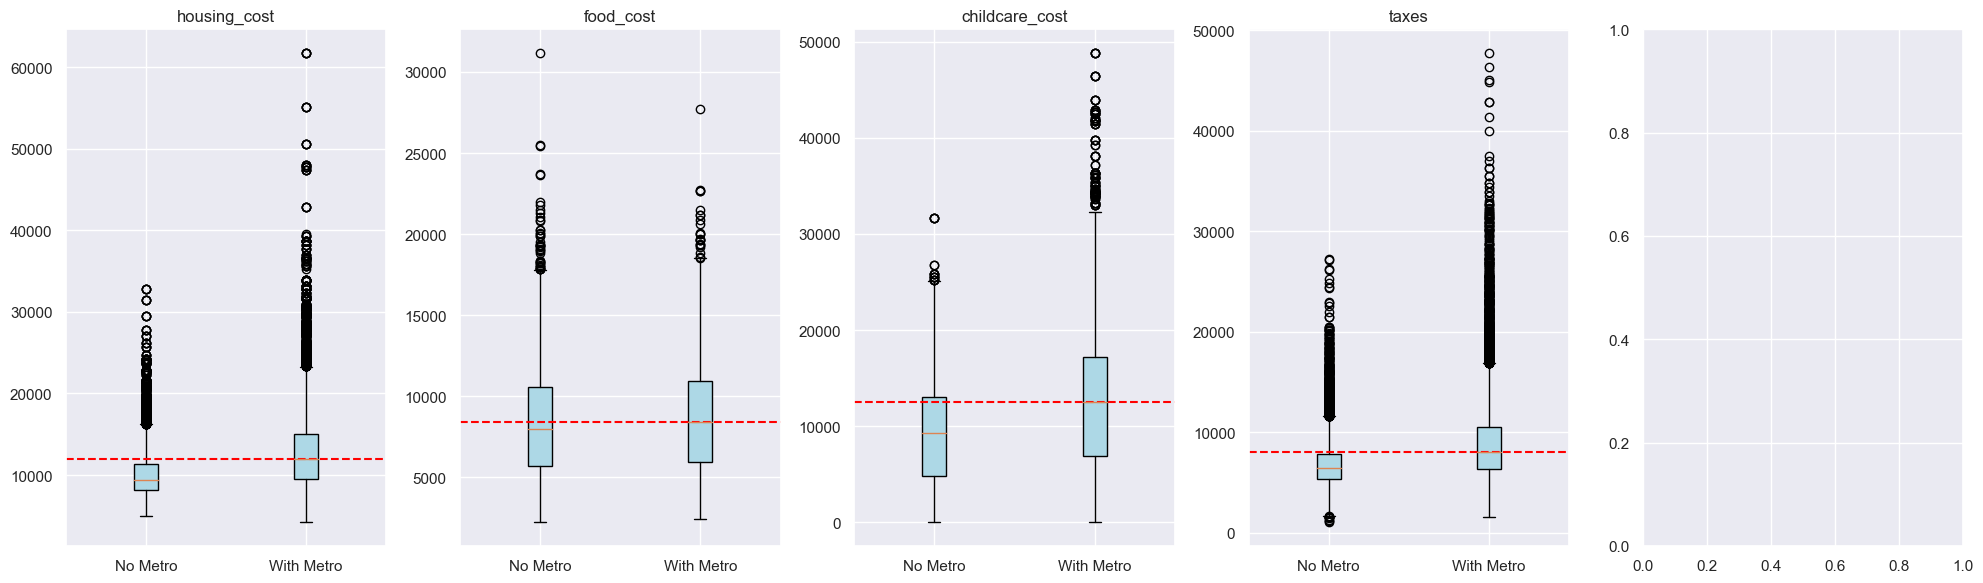

In [319]:
#בדקנו את הפער בין המקומות שבהם יש מטרו לבין המקומות בהם איו מטרו 
#בדקנו רק את הנתונים המשפיעים על לגידול הילדים
# רכיבת הגרפים
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

# רשימת עמודות המתארות את ההוצאות
cost_columns = ['housing_cost', 'food_cost', 'childcare_cost', 'taxes']

for i, column in enumerate(cost_columns):
    bp = axes[i].boxplot([df[df['isMetro'] == 0][column], df[df['isMetro'] == 1][column]], patch_artist=True, boxprops=dict(facecolor="lightblue"))
    axes[i].set_title(column)
    axes[i].axhline(y=df[df['isMetro'] == 1][column].median(), color='red', linestyle='--')
    axes[i].set_xticklabels(['No Metro', 'With Metro'])

# הצגת הגרפים
plt.tight_layout()
plt.show()



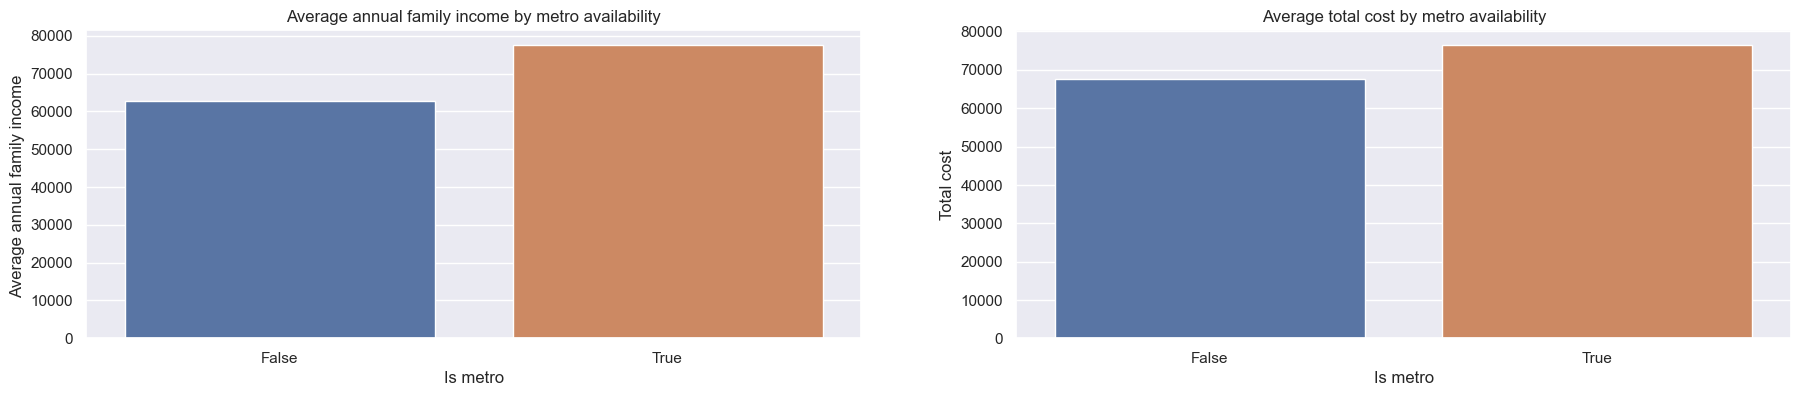

In [320]:
# Group by metro availability and calculate the mean annual living cost for both cases
metro = us_cost_df.groupby('isMetro')['total_cost'].agg('mean')
metro_income = us_cost_df.groupby('isMetro')['median_family_income'].agg('mean')

# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 4))

# Create a barplot
sns.barplot(x=metro_income.index, y=metro_income.values, ax=ax[0])

# Configure the plot
ax[0].set_title('Average annual family income by metro availability')
ax[0].set_xlabel('Is metro')
ax[0].set_ylabel('Average annual family income ')


# Create a barplot 
sns.barplot(x=metro.index, y=metro.values, ax=ax[1])

# Configure the plot
ax[1].set_title('Average total cost by metro availability')
ax[1].set_xlabel('Is metro')
ax[1].set_ylabel('Total cost')

# Display the plot
plt.show()

**לפי הגרפים, בחישוב מהיר עדיף לגור ביישוב, ההוצאות שם קטנות יותר**

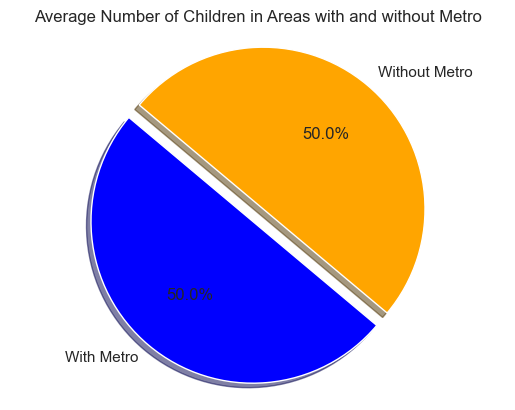

In [321]:
import pandas as pd
import matplotlib.pyplot as plt

# הנח שה-DataFrame שלך כבר קיים ושמו df
# df = pd.read_csv('path_to_your_data.csv')

# חישוב הממוצע של עמודת 'children' עבור ערים עם רכבות
average_children_with_metro =us_cost_df[us_cost_df['isMetro'] == 1]['children'].mean()

# חישוב הממוצע של עמודת 'children' עבור ערים בלי רכבות
average_children_without_metro = us_cost_df[us_cost_df['isMetro'] == 0]['children'].mean()

# יצירת נתונים עבור גרף העוגה
labels = ['With Metro', 'Without Metro']
sizes = [average_children_with_metro, average_children_without_metro]
colors = ['blue', 'orange']
explode = (0.1, 0)  # להוציא את הפרוסה הראשונה החוצה

# יצירת גרף עוגה
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Average Number of Children in Areas with and without Metro')
plt.axis('equal')  # שימור עיגול מדויק
plt.show()



**ממוצע חיסכון**

In [322]:
#  עם רכבת
#סינון הנתונים לערים עם מטרו
metro_cities = us_cost_df[us_cost_df['isMetro'] == True]

# חישוב ממוצע הכנסות
average_income_metro = metro_cities['median_family_income'].mean()

# חישוב ממוצע הוצאות
average_expenses_metro = metro_cities['total_cost'].mean()

# חישוב ממוצע הכנסות (ממוצע הכנסות פחות ממוצע הוצאות)
average_income_minus_expenses_metro = average_income_metro - average_expenses_metro

print(f"Average income in metro areas: {average_income_minus_expenses_metro:.2f}")

#סינון הנתונים לערים עם מטרו
metro_cities = us_cost_df[us_cost_df['isMetro'] == False]

# חישוב ממוצע הכנסות
average_income_metro = metro_cities['median_family_income'].mean()

# חישוב ממוצע הוצאות
average_expenses_metro = metro_cities['total_cost'].mean()

# חישוב ממוצע הכנסות (ממוצע הכנסות פחות ממוצע הוצאות)
average_income_minus_expenses_metro = average_income_metro - average_expenses_metro

print(f"Average income in metro areas: {average_income_minus_expenses_metro:.2f}")


Average income in metro areas: 1092.19
Average income in metro areas: -4761.99


**הרבה יותר משתלם לגור בעיר גם חוסכים יותר , גם גרים קרוב למטרו, גם קרובים בכללי להכל, וגם מביאים אותם כמות ילדים בממוצע**

**רצינו לראות את ההתפלגות של יוקר המחיה במחוזות ארה"ב מסקנה 2**


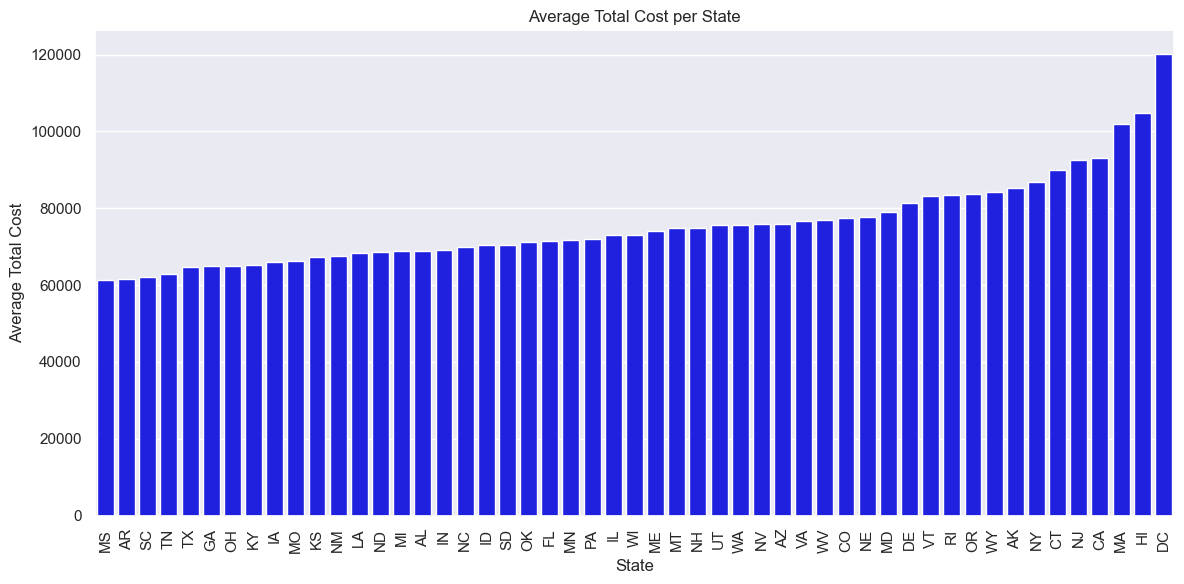

In [323]:
# חישוב ה-total cost ממוצע לכל מדינה
average_total_cost = us_cost_df.groupby('state')['total_cost'].mean().sort_values().reset_index()

# יצירת גרף בר המראה את ה-total cost ממוצע לכל מדינה
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='total_cost', data=average_total_cost, color='blue')
plt.xlabel('State')
plt.ylabel('Average Total Cost')
plt.title('Average Total Cost per State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**חיפשנו 2 מדינות בעלות מספר מחוזות דומות כדי להשוות ביינהם את הפער בין הוצאות לבריאות בייחס להכנסות**

In [324]:
#מדינת Ny - מייצגת מדינה בעלת הוצאות גבוהות

# Filter rows for the state of Hawaii (HI)
hawaii_data = us_cost_df[us_cost_df['state'] == 'LA']

# Count the number of rows for Hawaii
hawaii_row_count = hawaii_data.shape[0]

# Display the result
print(f"Number of rows for the state of Hawaii (LA): {hawaii_row_count}")


Number of rows for the state of Hawaii (LA): 640


In [325]:
#la - מייצגת מדינה בעלת הוצאות נמוכות יחסית

# Filter rows for the state of Hawaii (HI)
hawaii_data = us_cost_df[us_cost_df['state'] == 'NY']

# Count the number of rows for Hawaii
hawaii_row_count = hawaii_data.shape[0]

# Display the result
print(f"Number of rows for the state of Hawaii (NY): {hawaii_row_count}")


Number of rows for the state of Hawaii (NY): 620


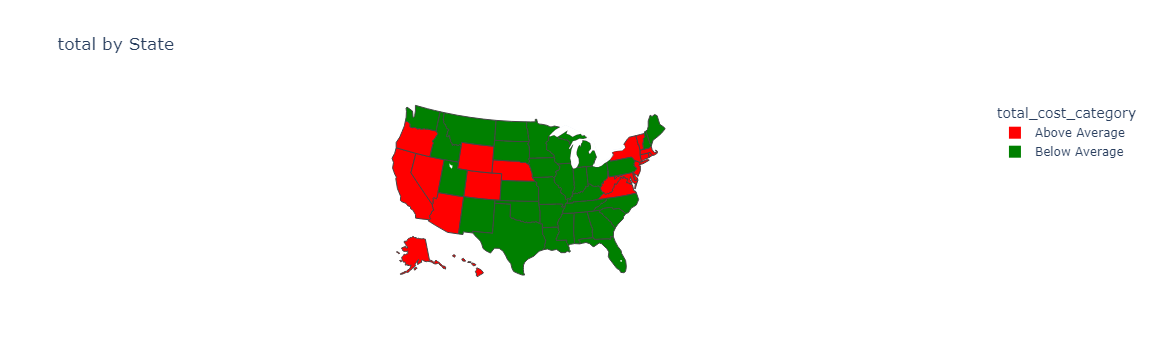

In [326]:
import pandas as pd
import plotly.express as px


# Group by state and calculate the mean income
state_tote_mean =us_cost_df.groupby('county')['total_cost'].mean().reset_index()

# Calculate the overall mean income
overall_mean_tote = state_tote_mean['total_cost'].mean()

# Create a new column to classify states above or below the mean
state_tote_mean['total_cost_category'] = state_tote_mean['total_cost'].apply(
    lambda x: 'Above Average' if x > overall_mean_tote else 'Below Average'
)

# Define colors for above and below average
color_scale = {
    'Above Average': 'red',
    'Below Average': 'green'
}

# Create the choropleth map
fig = px.choropleth(state_income_mean,
                    locationmode="USA-states",
                    locations="state", 
                    color="total_cost_category", 
                    hover_name="state", 
                    color_discrete_map=color_scale,
                    scope='usa', 
                    title='total by State')

# Show the plot
fig.show()


In [361]:


# Group by the 'state' column and count the number of rows for each state
state_counts = us_cost_df.groupby('state').size().reset_index(name='row_count')

# Sort the counts in descending order
state_counts_sorted = state_counts.sort_values(by='row_count', ascending=False)

# Display the counts for each state
print(state_counts_sorted)


   state  row_count
43    TX       2540
10    GA       1590
45    VA       1330
17    KY       1200
24    MO       1160
16    KS       1050
14    IL       1020
27    NC       1000
12    IA        990
42    TN        950
29    NE        930
15    IN        920
35    OH        880
23    MN        870
22    MI        830
25    MS        820
36    OK        770
2     AR        750
48    WI        720
9     FL        670
1     AL        670
38    PA        670
41    SD        660
18    LA        640
5     CO        640
34    NY        620
4     CA        580
26    MT        560
49    WV        550
28    ND        530
40    SC        460
13    ID        440
47    WA        390
37    OR        360
32    NM        330
44    UT        290
0     AK        290
20    MD        240
50    WY        230
31    NJ        210
33    NV        170
21    ME        160
3     AZ        150
19    MA        140
46    VT        140
30    NH        100
6     CT         80
39    RI         50
11    HI         50


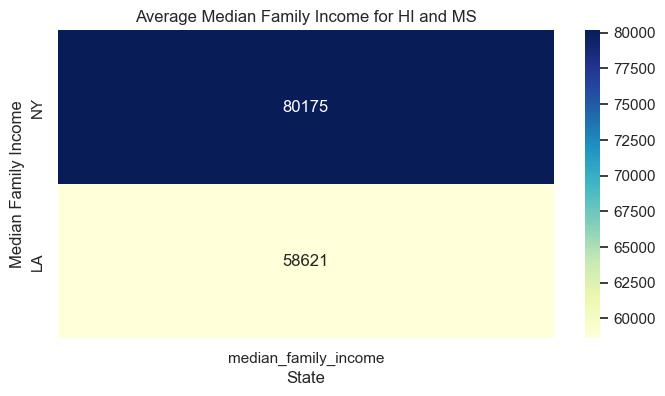

In [327]:

# סינון הנתונים לפי מדינה
df_states = us_cost_df[['state', 'median_family_income']].copy()

# בחירת מדינות HI ו-MS
selected_states = ['LA', 'NY']
df_selected_states = df_states[df_states['state'].isin(selected_states)]

# יצירת טבלה פיבוט עבור ממוצע ההכנסה המשפחתית לפי מדינה
pivot_table = df_selected_states.pivot_table(values='median_family_income', index='state', aggfunc='mean')

# מיון הטבלה לפי ממוצע ההכנסה המשפחתית
pivot_table_sorted = pivot_table.sort_values(by='median_family_income', ascending=False)

# עיצוב והצגה של הטבלה
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table_sorted, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Average Median Family Income for HI and MS')
plt.xlabel('State')
plt.ylabel('Median Family Income')
plt.show()


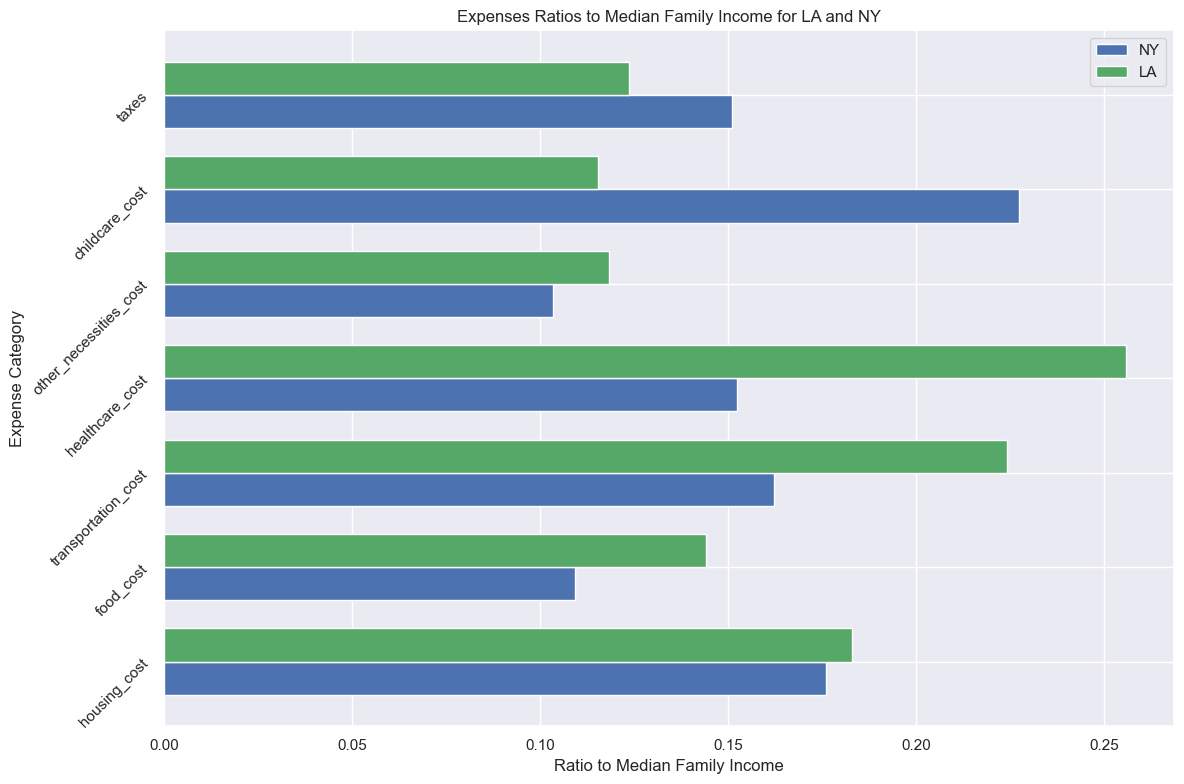

In [328]:

# Filter data for states NY and LA
df_ny = us_cost_df[us_cost_df['state'] == 'NY']
df_la = us_cost_df[us_cost_df['state'] == 'LA']

# Calculate average median family income for NY and LA
income_ny_mean = df_ny['median_family_income'].mean()
income_la_mean = df_la['median_family_income'].mean()

# Columns representing different expense categories
expenses_cols = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes']

# Calculate average expenses for NY and LA
expenses_ny_means = df_ny[expenses_cols].mean()
expenses_la_means = df_la[expenses_cols].mean()

# Create a horizontal bar plot comparing the expenses to median family income ratios for NY and LA
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(expenses_cols))
plt.barh(index, expenses_ny_means / income_ny_mean, bar_width, label='NY', color='b')
plt.barh([i + bar_width for i in index], expenses_la_means / income_la_mean, bar_width, label='LA', color='g')

plt.ylabel('Expense Category')
plt.xlabel('Ratio to Median Family Income')
plt.title('Expenses Ratios to Median Family Income for LA and NY')
plt.yticks([i + bar_width / 2 for i in index], expenses_cols, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [329]:
#באופן גורף במדינות היקרות יותר מוציאים פחות על בריאות תחבורה ואוכל לעומת המדינות הזולות 

In [330]:
#רצינו להשוות בין כל המדינות בין ההכנסה של משפחה לבין הוצאות על הבריאות
# עשינו ממוצע בין ההכנסה והכנסנו לגרף אחד מדינות עשירות ולגרף שני מדינות עניות 
# ובדקנו

In [331]:
#מדינות יקרות

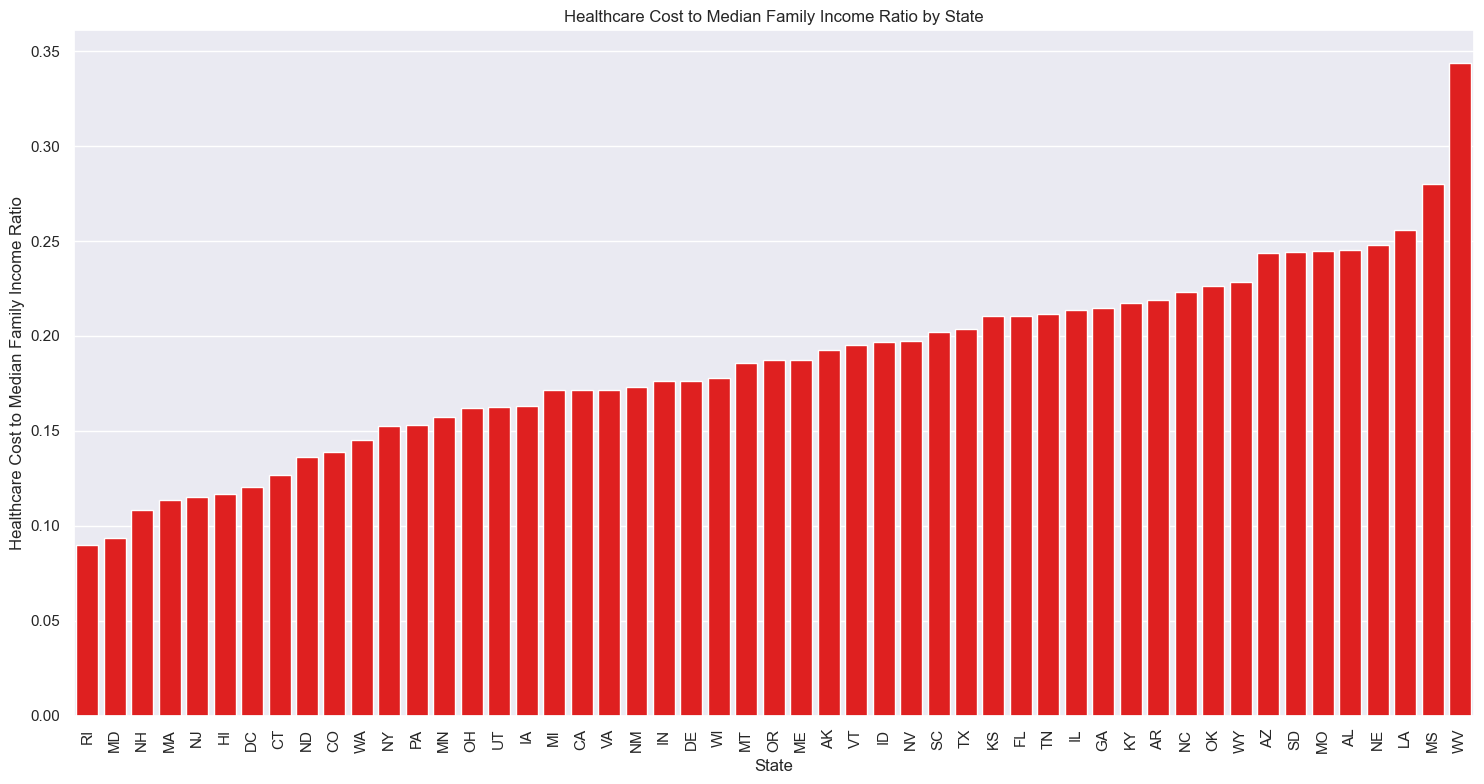

In [332]:
# Calculate the average median family income and average healthcare cost for each state
average_income = us_cost_df.groupby('state')['median_family_income'].mean().reset_index()
average_healthcare_cost = us_cost_df.groupby('state')['healthcare_cost'].mean().reset_index()

# Merge the two DataFrames
average_data = pd.merge(average_income, average_healthcare_cost, on='state')

# Calculate the ratio of average healthcare cost to average median family income for each state
average_data['healthcare_to_income_ratio'] = average_data['healthcare_cost'] / average_data['median_family_income']

# Sort the data by the ratio
average_data_sorted = average_data.sort_values('healthcare_to_income_ratio', ascending=True)

# Create a vertical bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='state', y='healthcare_to_income_ratio', data=average_data_sorted, color='red', order=average_data_sorted['state'])

plt.xlabel('State')
plt.ylabel('Healthcare Cost to Median Family Income Ratio')
plt.title('Healthcare Cost to Median Family Income Ratio by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


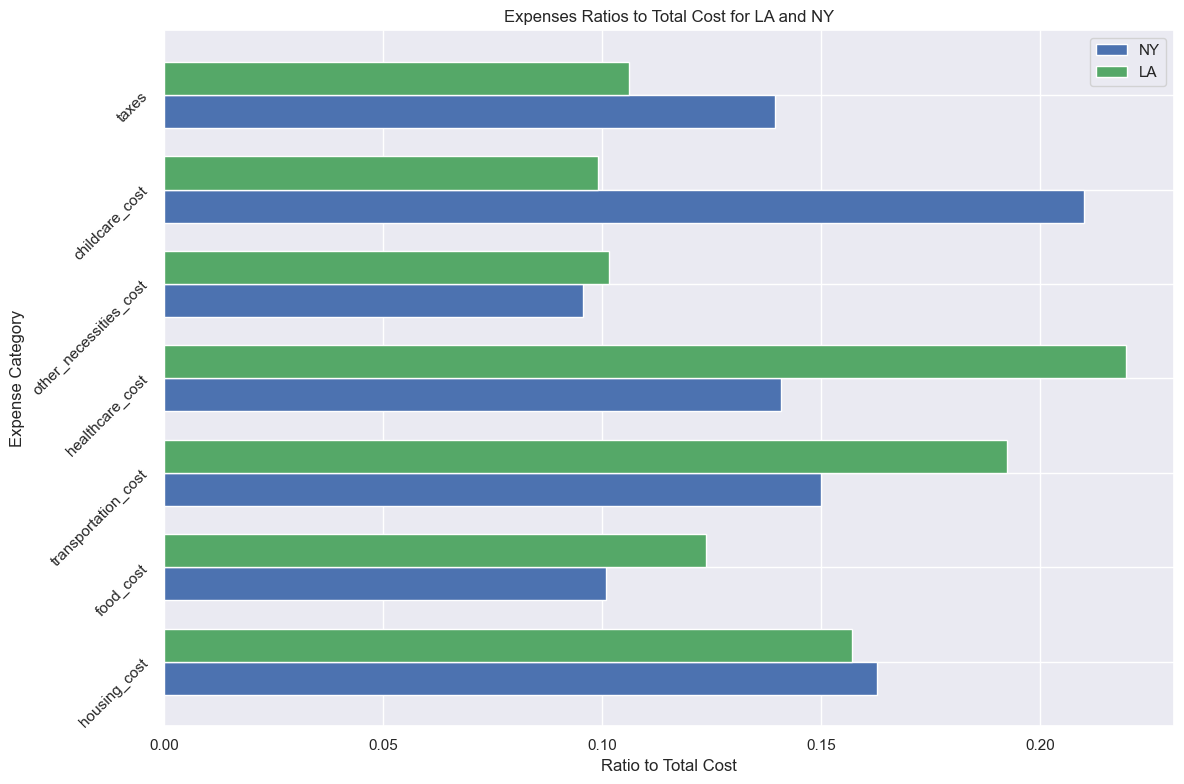

In [353]:
# Filter data for states NY and LA
df_ny = us_cost_df[us_cost_df['state'] == 'NY']
df_la = us_cost_df[us_cost_df['state'] == 'LA']

# Calculate average total cost for NY and LA
total_cost_ny_mean = df_ny['total_cost'].mean()
total_cost_la_mean = df_la['total_cost'].mean()

# Columns representing different expense categories
expenses_cols = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes']

# Calculate average expenses for NY and LA
expenses_ny_means = df_ny[expenses_cols].mean()
expenses_la_means = df_la[expenses_cols].mean()

# Create a horizontal bar plot comparing the expenses to total cost ratios for NY and LA
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(expenses_cols))
plt.barh(index, expenses_ny_means / total_cost_ny_mean, bar_width, label='NY', color='b')
plt.barh([i + bar_width for i in index], expenses_la_means / total_cost_la_mean, bar_width, label='LA', color='g')

plt.ylabel('Expense Category')
plt.xlabel('Ratio to Total Cost')
plt.title('Expenses Ratios to Total Cost for LA and NY')
plt.yticks([i + bar_width / 2 for i in index], expenses_cols, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


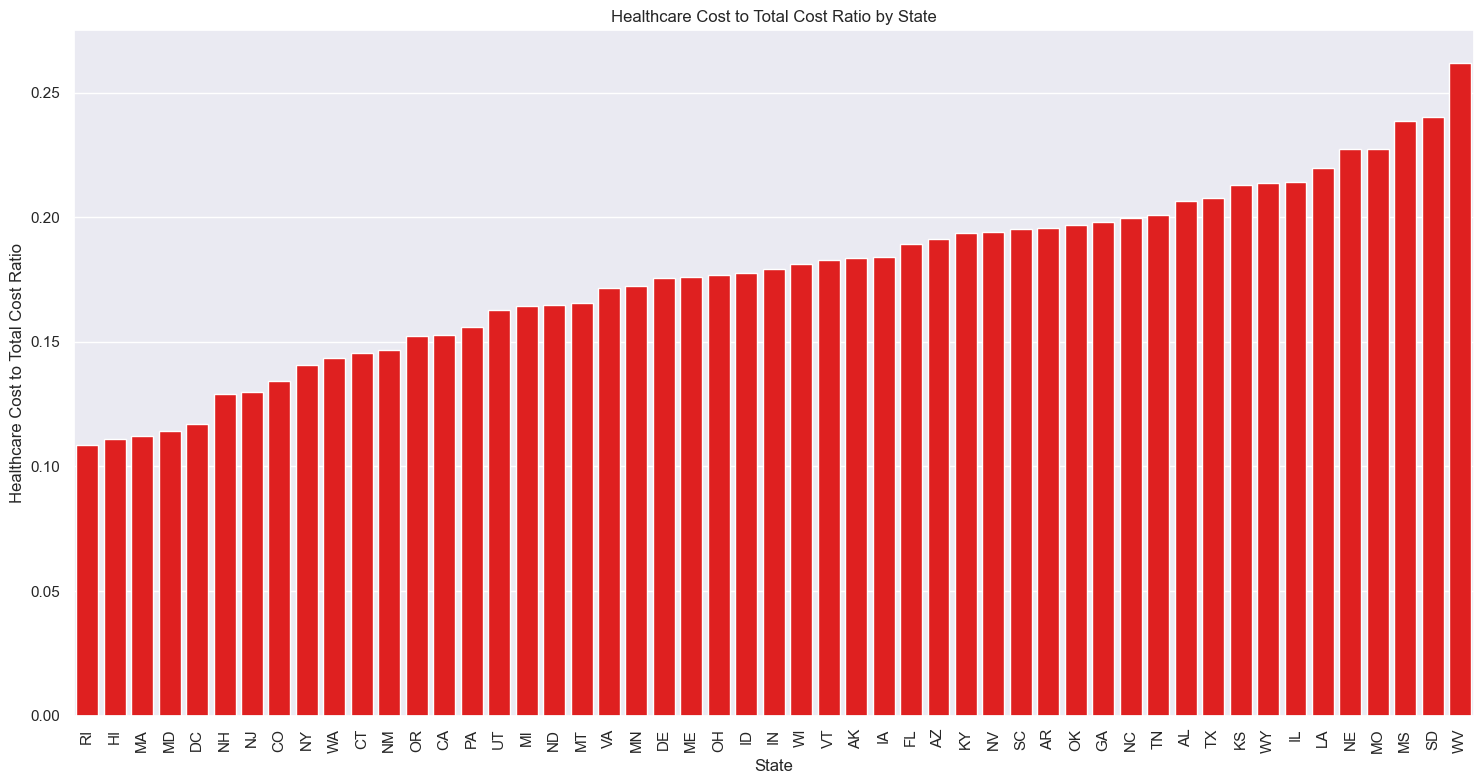

In [354]:
# Calculate the average total cost for each state
average_total_cost = us_cost_df.groupby('state')['total_cost'].mean().reset_index()

# Calculate the average healthcare cost for each state
average_healthcare_cost = us_cost_df.groupby('state')['healthcare_cost'].mean().reset_index()

# Merge the two DataFrames
average_data = pd.merge(average_total_cost, average_healthcare_cost, on='state')

# Calculate the ratio of average healthcare cost to average total cost for each state
average_data['healthcare_to_total_cost_ratio'] = average_data['healthcare_cost'] / average_data['total_cost']

# Sort the data by the ratio
average_data_sorted = average_data.sort_values('healthcare_to_total_cost_ratio', ascending=True)

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='state', y='healthcare_to_total_cost_ratio', data=average_data_sorted, color='red')

plt.xlabel('State')
plt.ylabel('Healthcare Cost to Total Cost Ratio')
plt.title('Healthcare Cost to Total Cost Ratio by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



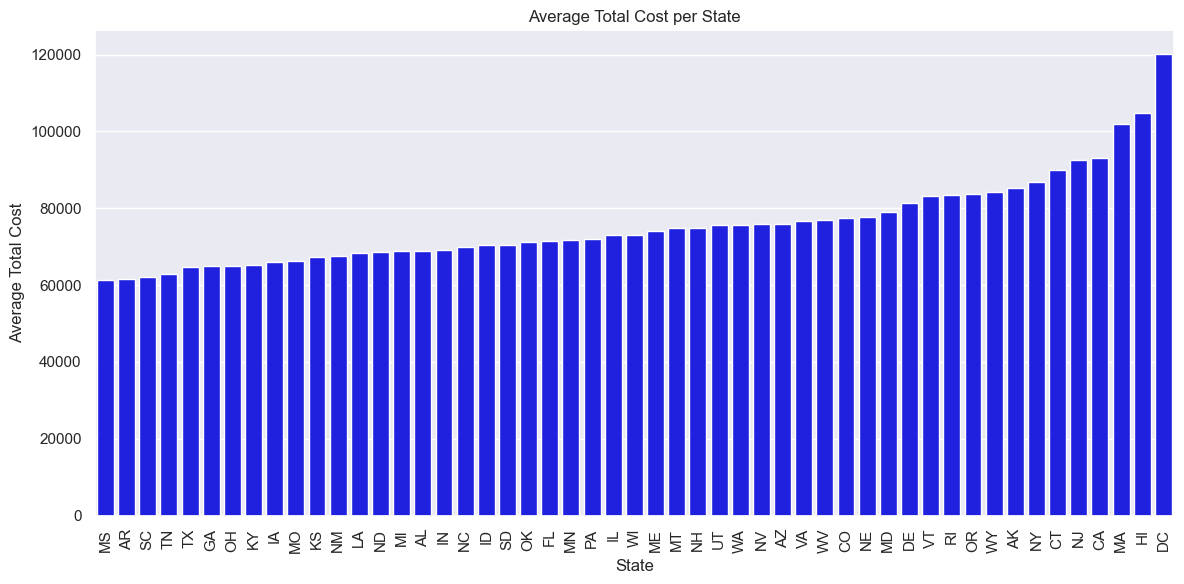

In [355]:
# חישוב ה-total cost ממוצע לכל מדינה
average_total_cost = us_cost_df.groupby('state')['total_cost'].mean().sort_values().reset_index()

# יצירת גרף בר המראה את ה-total cost ממוצע לכל מדינה
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='total_cost', data=average_total_cost, color='blue')
plt.xlabel('State')
plt.ylabel('Average Total Cost')
plt.title('Average Total Cost per State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

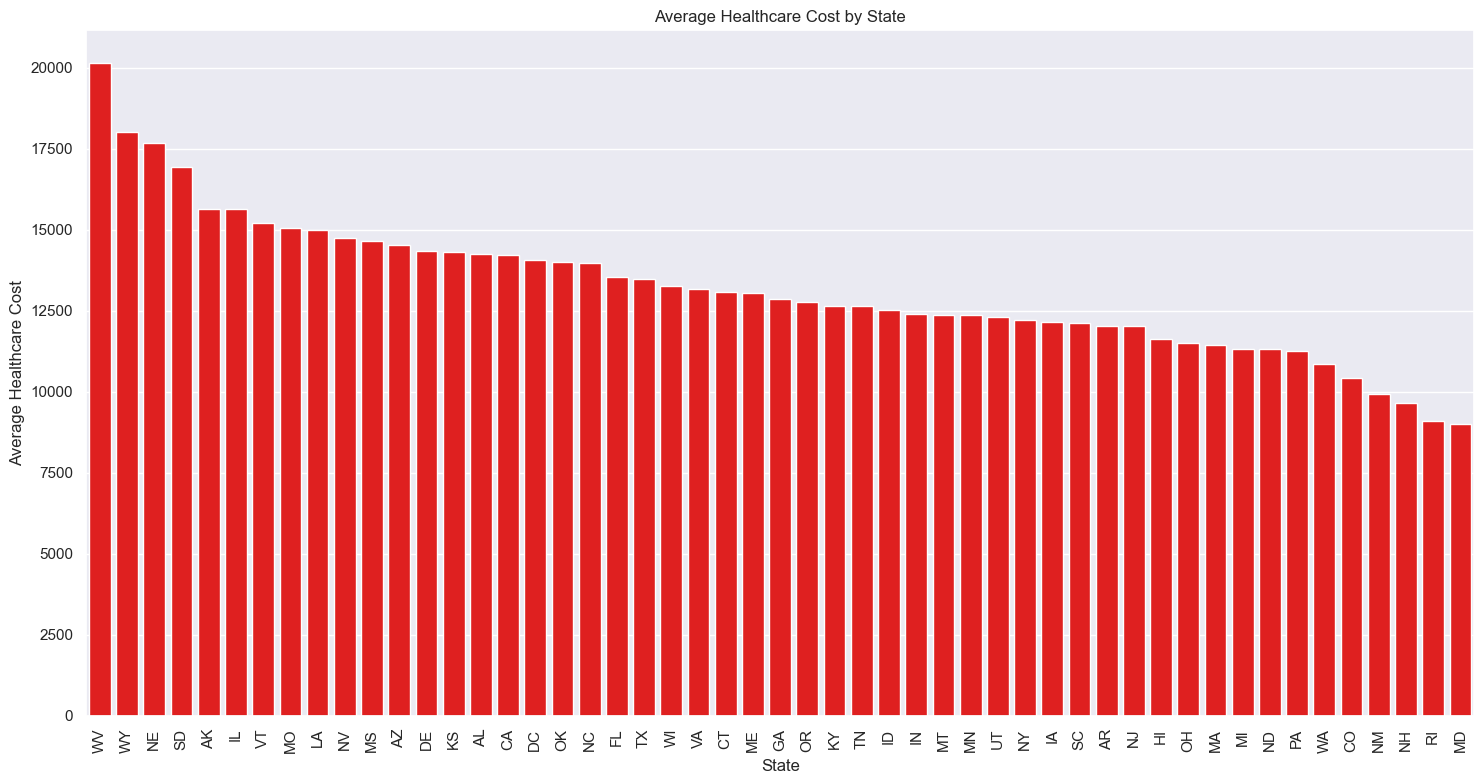

In [356]:
# Calculate the average healthcare cost for each state
average_healthcare_cost = us_cost_df.groupby('state')['healthcare_cost'].mean().reset_index()

# Sort the data by the average healthcare cost
average_healthcare_cost_sorted = average_healthcare_cost.sort_values('healthcare_cost', ascending=False)

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='state', y='healthcare_cost', data=average_healthcare_cost_sorted, color='red')

plt.xlabel('State')
plt.ylabel('Average Healthcare Cost')
plt.title('Average Healthcare Cost by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



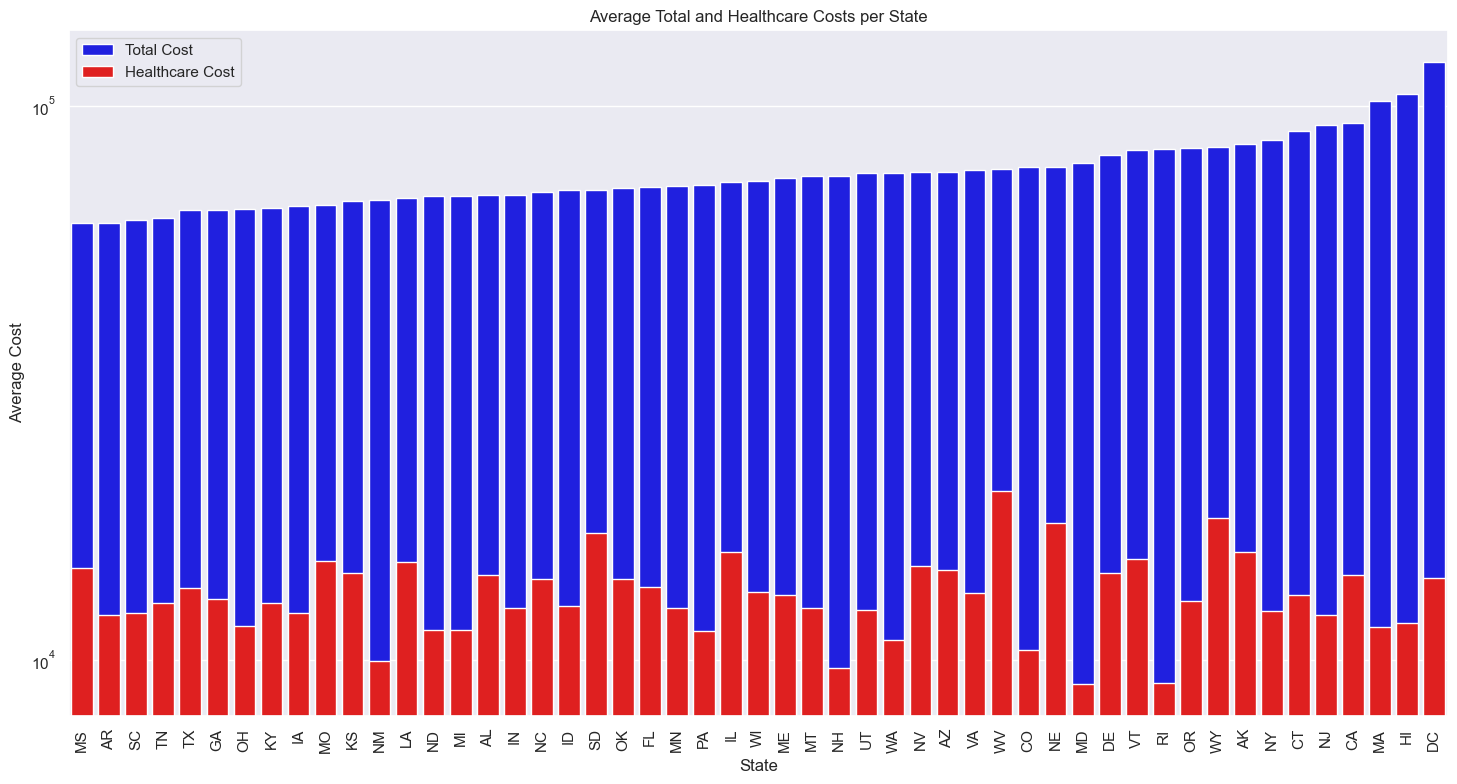

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the average total cost for each state
average_total_cost = us_cost_df.groupby('state')['total_cost'].mean().sort_values().reset_index()

# Calculate the average healthcare cost for each state
average_healthcare_cost = us_cost_df.groupby('state')['healthcare_cost'].mean().reset_index()

# Merge the two DataFrames
average_data = pd.merge(average_total_cost, average_healthcare_cost, on='state')

# Create a bar plot
plt.figure(figsize=(15, 8))
ax=sns.barplot(x='state', y='total_cost', data=average_data, color='blue', label='Total Cost')
ax=sns.barplot(x='state', y='healthcare_cost', data=average_data, color='red', label='Healthcare Cost')

plt.xlabel('State')
plt.ylabel('Average Cost')
plt.title('Average Total and Healthcare Costs per State')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
ax.set_yscale("log")
plt.show()


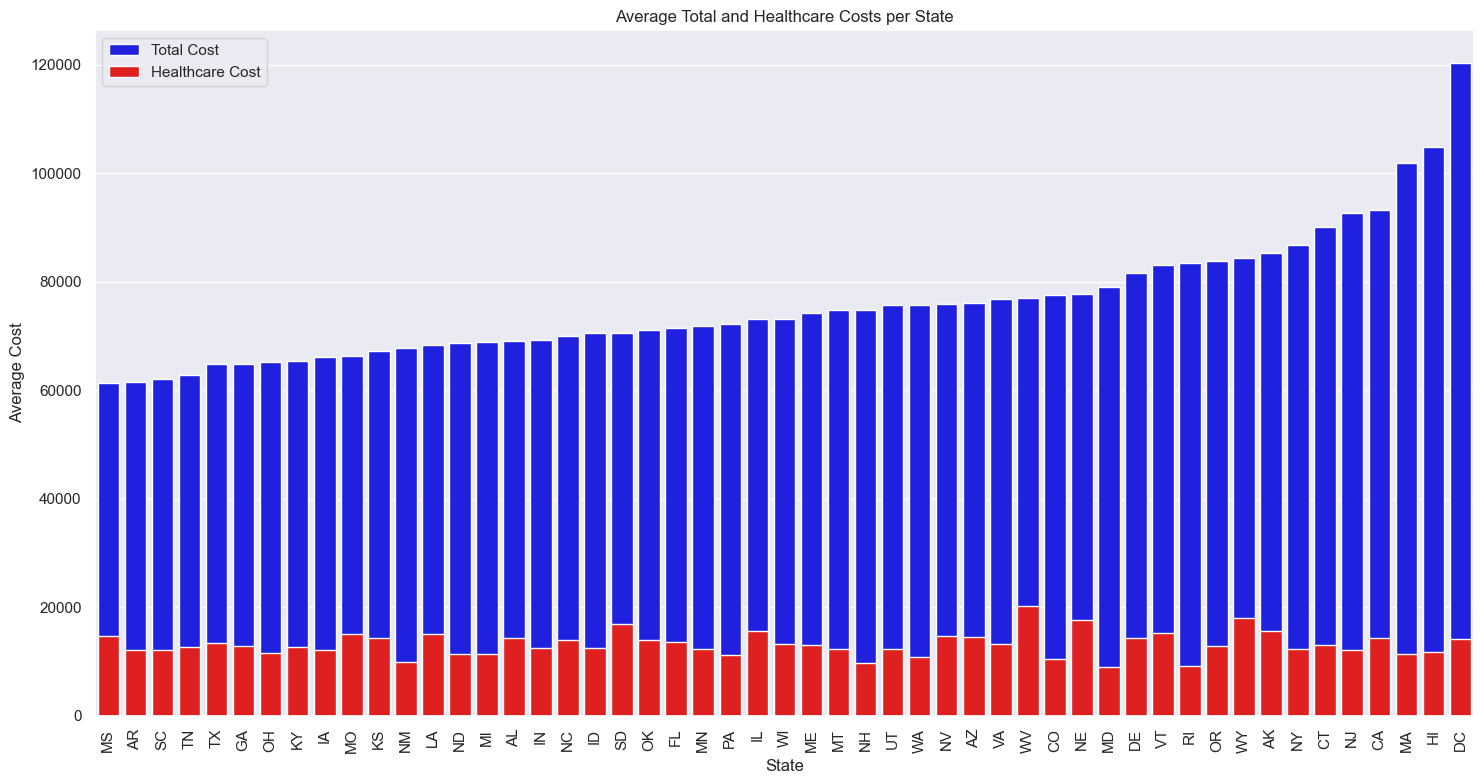

In [358]:
# Calculate the average total cost for each state
average_total_cost = us_cost_df.groupby('state')['total_cost'].mean().sort_values().reset_index()

# Calculate the average healthcare cost for each state
average_healthcare_cost = us_cost_df.groupby('state')['healthcare_cost'].mean().reset_index()

# Merge the two DataFrames
average_data = pd.merge(average_total_cost, average_healthcare_cost, on='state')

# Create a bar plot
plt.figure(figsize=(15, 8))
ax=sns.barplot(x='state', y='total_cost', data=average_data, color='blue', label='Total Cost')
ax=sns.barplot(x='state', y='healthcare_cost', data=average_data, color='red', label='Healthcare Cost')

plt.xlabel('State')
plt.ylabel('Average Cost')
plt.title('Average Total and Healthcare Costs per State')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [359]:


# Calculate the median of 'total_cost' for every 10 rows starting from the first row
medians = []
total_costs = us_cost_df['total_cost'].tolist()

# Iterate through the list in chunks of 10, starting from the first element
for i in range(0, len(total_costs), 10):
    chunk = total_costs[i:i+10]
    median = pd.Series(chunk).median()
    medians.extend([median] * len(chunk))

# Ensure that the length of the medians list matches the length of the data
medians = medians[:len(us_cost_df)]

# Add the calculated medians to the dataframe
us_cost_df['median_total_cost'] = medians

# Display the updated dataframe
print(us_cost_df.head(5))


   case_id state  isMetro            areaname          county  \
0        1    AL     True  Montgomery, AL MSA  Autauga County   
1        1    AL     True  Montgomery, AL MSA  Autauga County   
2        1    AL     True  Montgomery, AL MSA  Autauga County   
3        1    AL     True  Montgomery, AL MSA  Autauga County   
4        1    AL     True  Montgomery, AL MSA  Autauga County   

  family_member_count  housing_cost    food_cost  transportation_cost  \
0                1p0c    8505.72876   3454.91712          10829.16876   
1                1p1c   12067.50240   5091.70788          11588.19288   
2                1p2c   12067.50240   7460.20308          12361.77720   
3                1p3c   15257.15040   9952.23924          13452.18600   
4                1p4c   15257.15040  12182.21400          13744.59840   

   healthcare_cost  other_necessities_cost  childcare_cost        taxes  \
0       5737.47984              4333.81344          0.0000   6392.94504   
1       8659.55640  

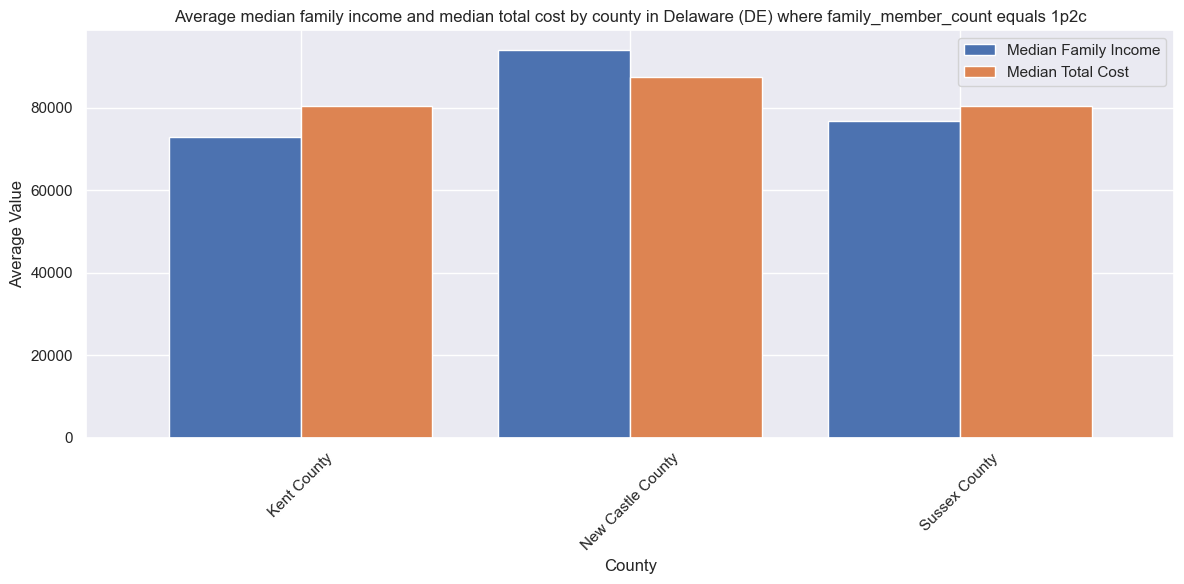

In [376]:


# בחירת שורות שהמדינה היא Delaware (DE) ו-family_member_count הוא 1p2c
data_de = us_cost_df[(us_cost_df['state'] == 'DE') & (us_cost_df['family_member_count'] == '1p2c')]

# חישוב הממוצע הכולל של median_family_income לפי מחוזים
avg_income_by_county = data_de.groupby('county')['median_family_income'].mean().reset_index()

# חישוב הממוצע הכולל של median_total_cost לפי מחוזים
avg_cost_by_county = data_de.groupby('county')['median_total_cost'].mean().reset_index()

# מיזוג של הנתונים לטבלה אחת
merged_data = pd.merge(avg_income_by_county, avg_cost_by_county, on='county')

# יצירת ברפלוט
merged_data.plot(kind='bar', x='county', figsize=(12, 6), width=0.8)
plt.xticks(rotation=45)  # סיבוב את התוויות על ציר ה-X
plt.xlabel('County')
plt.ylabel('Average Value')
plt.title('Average median family income and median total cost by county in Delaware (DE) where family_member_count equals 1p2c')
plt.legend(['Median Family Income', 'Median Total Cost'])  # הוספת סימוני הסבר לברפלוט

# הצגת הגרף
plt.tight_layout()
plt.show()


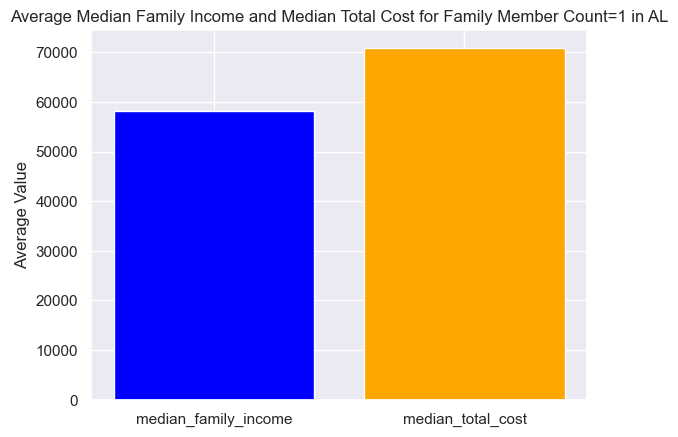

In [388]:

# סינון הנתונים
filtered_data = us_cost_df[(us_cost_df['state'] == 'AL') & (us_cost_df['family_member_count'] == '1p2c')]

# חישוב הממוצעים
avg_income = filtered_data['median_family_income'].mean()
avg_cost = filtered_data['median_total_cost'].mean()

# יצירת הגרף
fig, ax = plt.subplots()
ax.bar(['median_family_income', 'median_total_cost'], [avg_income, avg_cost], color=['blue', 'orange'])
ax.set_ylabel('Average Value')
ax.set_title('Average Median Family Income and Median Total Cost for Family Member Count=1 in AL')
plt.show()

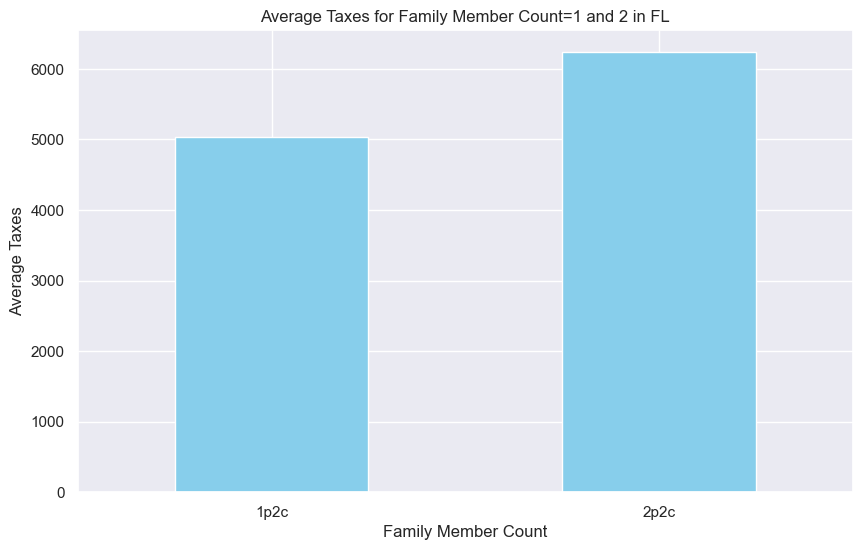

In [390]:
import matplotlib.pyplot as plt

# סינון הנתונים
filtered_data = us_cost_df[(us_cost_df['state'] == 'FL') & (us_cost_df['family_member_count'].isin(['1p2c', '2p2c']))]

# חישוב הממוצעים
avg_taxes_by_count = filtered_data.groupby('family_member_count')['taxes'].mean()

# יצירת הגרף
plt.figure(figsize=(10, 6))
avg_taxes_by_count.plot(kind='bar', color='skyblue')
plt.xlabel('Family Member Count')
plt.ylabel('Average Taxes')
plt.title('Average Taxes for Family Member Count=1 and 2 in FL')
plt.xticks(rotation=0)
plt.show()


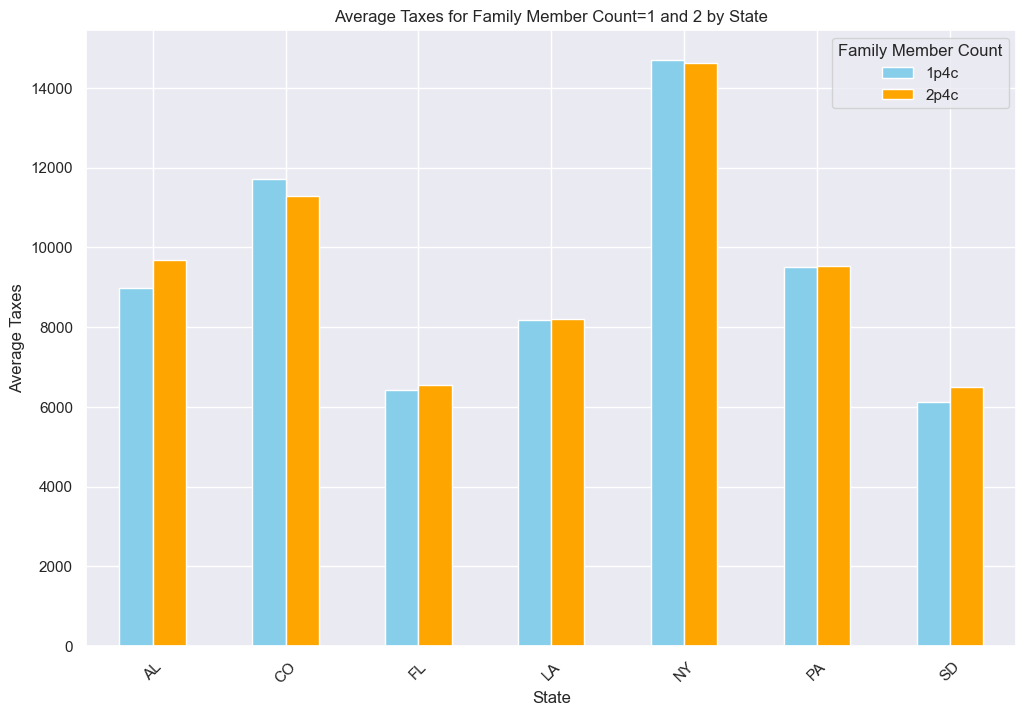

In [412]:
import matplotlib.pyplot as plt

# רשימת המדינות שבהן נרצה לבדוק את הנתונים
states = ['FL', 'AL', 'PA', 'SD', 'LA', 'CO', 'NY']

# סינון הנתונים
filtered_data = us_cost_df[(us_cost_df['state'].isin(states)) & (us_cost_df['family_member_count'].isin(['1p4c', '2p4c']))]

# חישוב הממוצעים
avg_taxes_by_state_count = filtered_data.groupby(['state', 'family_member_count'])['taxes'].mean().unstack()

# יצירת הגרף
plt.figure(figsize=(12, 8))
avg_taxes_by_state_count.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'orange'])
plt.xlabel('State')
plt.ylabel('Average Taxes')
plt.title('Average Taxes for Family Member Count=1 and 2 by State')
plt.xticks(rotation=45)
plt.legend(title='Family Member Count')
plt.show()


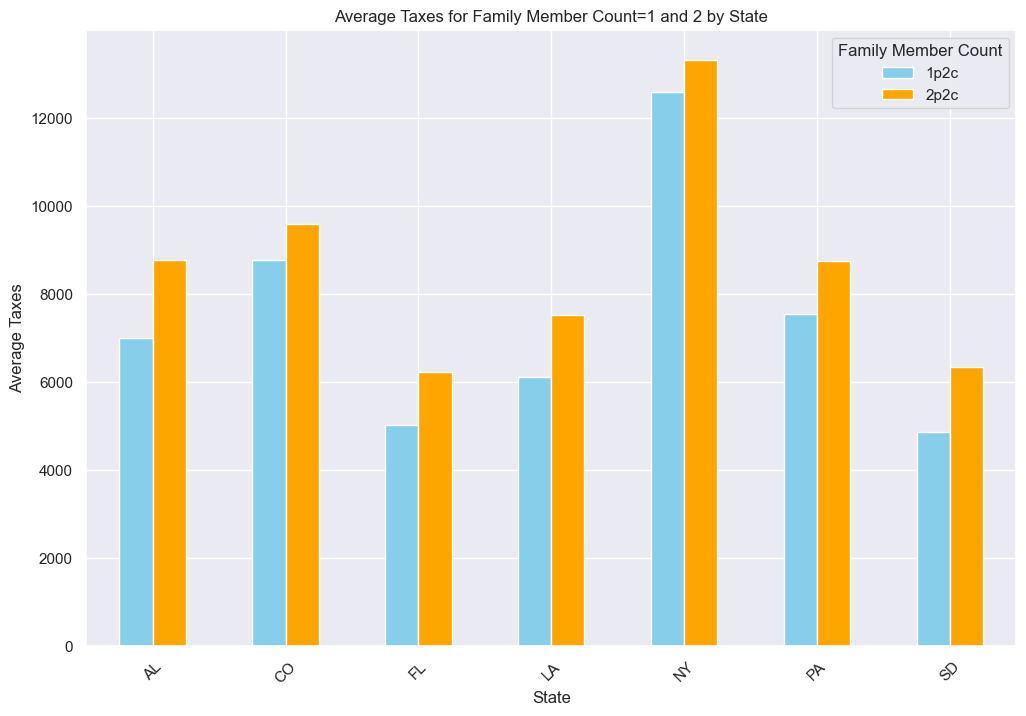

In [399]:
import matplotlib.pyplot as plt

# רשימת המדינות שבהן נרצה לבדוק את הנתונים
states = ['FL', 'AL', 'PA', 'SD', 'LA', 'CO', 'NY']

# סינון הנתונים
filtered_data = us_cost_df[(us_cost_df['state'].isin(states)) & (us_cost_df['family_member_count'].isin(['1p2c', '2p2c']))]

# חישוב הממוצעים
avg_taxes_by_state_count = filtered_data.groupby(['state', 'family_member_count'])['taxes'].mean().unstack()

# יצירת הגרף
plt.figure(figsize=(12, 8))
avg_taxes_by_state_count.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'orange'])
plt.xlabel('State')
plt.ylabel('Average Taxes')
plt.title('Average Taxes for Family Member Count=1 and 2 by State')
plt.xticks(rotation=45)
plt.legend(title='Family Member Count')
plt.show()


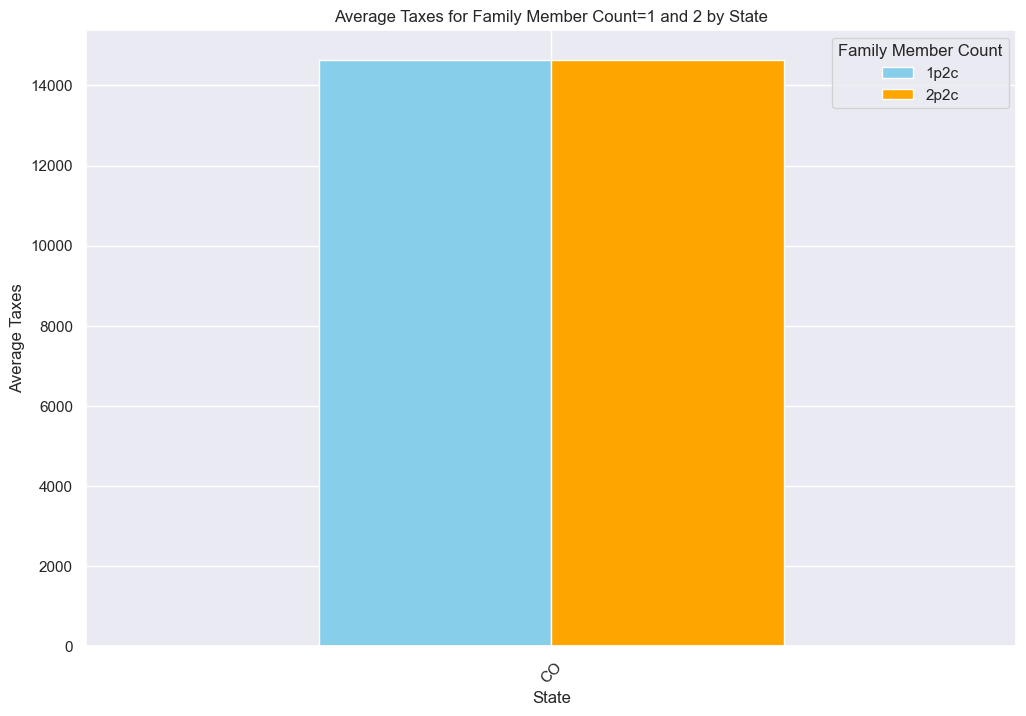

In [410]:
import matplotlib.pyplot as plt

# רשימת המדינות שבהן נרצה לבדוק את הנתונים
states = ['CO']

# סינון הנתונים
filtered_data = us_cost_df[(us_cost_df['state'].isin(states)) & (us_cost_df['family_member_count'].isin(['1p2c', '2p2c']))]

# חישוב הממוצעים
avg_taxes_by_state_count = filtered_data.groupby(['state', 'family_member_count'])['childcare_cost'].mean().unstack()

# יצירת הגרף
plt.figure(figsize=(12, 8))
avg_taxes_by_state_count.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'orange'])
plt.xlabel('State')
plt.ylabel('Average Taxes')
plt.title('Average Taxes for Family Member Count=1 and 2 by State')
plt.xticks(rotation=45)
plt.legend(title='Family Member Count')
plt.show()
